## Transportation Safety Board of Canada Proposal

By: Ryan Hatcher (Student #: 201916418)



# Goal Definitions

## Broad Goal

The broad goal of this project is to find out where efforts should be focused to improve the safety of Canadian airspace.

## Sub Goals

### Investigating Aircraft Brands

One of the first steps we can take to determine where to focus the efforts of the Transportation Safety Board of Canada is to look at brand of aircrafts involved in the incidents. The brand of aircraft can tell us a lot about the incidents. For example, if we see few brands being involved in a majority of incidents, we can focus on the standards of the aircrafts being built. So, our first sub goal is to investigate aircraft brands.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact
df = pd.read_csv('flights.csv')


In [2]:
df1 = df[["aircraft_make",'damage','reportable_incident']]
df1 = df1[df1.damage!= "NONE"]
df1 = df1[df1.aircraft_make != 'UNKNOWN']


df1 = df1.groupby(['aircraft_make']).count()
df1 = df1.sort_values(by='damage', ascending=False)
total=df1['damage'].sum()
percentSeries = df1['damage']/total


[Text(0, 0, '28.8%'),
 Text(0, 0, '12.5%'),
 Text(0, 0, '6.8%'),
 Text(0, 0, '4.6%'),
 Text(0, 0, '4.4%')]

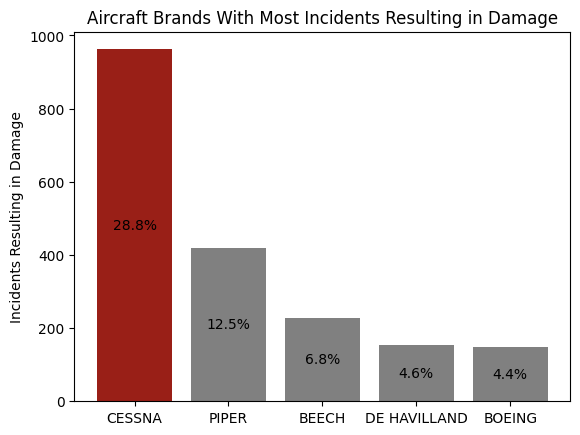

In [3]:
fig, ax = plt.subplots()

ax.set_ylabel("Incidents Resulting in Damage")
ax.set_title("Aircraft Brands With Most Incidents Resulting in Damage")


barlabels=['28.8%','12.5%','6.8%','4.6%','4.4%']

brands = ['CESSNA','PIPER','BEECH','DE HAVILLAND','BOEING']
colours = ["#991f17", "grey", "grey", "grey",'grey']
barplot = ax.bar(brands,df1['damage'].head(),color=colours,)
ax.bar_label(barplot,labels=barlabels,label_type='center')

### Expansion of Visualization

This purpose of this visualization is to show that these aircraft brands cause the most incidents within Canada. Furthermore, CESSNA aircrafts are responsible for nearly one thousand incidents in the year 2022. This relates to the sub goal of investigating the aircraft brands that cause the most incidents according to the Transportation Safety Board of Canada. With this information, the Transportation Safety Board of Canada can begin investigating the manufacturing of CESSNA.


### Investigating Where Incidents Occur

The regions in which the incidents occur can tell us a lot about Canadian air safety. Another one of our sub goals is to determine where the incidents occur. We are doing this to determine whether or not the standards of airports in each region is up to par with the rest.

In [4]:
df2 = df[["region",'id']]
df_sum = df2.groupby(['region']).count().sum()


df2 = df2.groupby(['region']).count()
df2['total incidents']=df2['id']

df2=df2.drop('id',axis=1)
df2["percent of incidents"] = (df2['total incidents']/float(df_sum)).sort_values(ascending=True)
df2=df2.sort_values(by='percent of incidents',ascending=False)

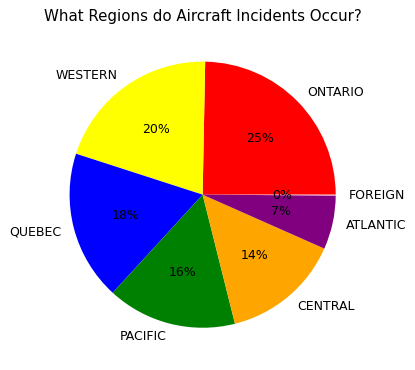

In [5]:
fig, ax = plt.subplots()
regions = ['ONTARIO','WESTERN','QUEBEC','PACIFIC','CENTRAL','ATLANTIC','FOREIGN']
fig.set_dpi(90)

ax.set_title("What Regions do Aircraft Incidents Occur?")
plt.pie(df2['percent of incidents'], labels=regions, autopct='%1.0f%%',colors=["red", "yellow", "blue", "green", "orange",'purple','pink']); 

## Expansion of Visualization

In this visualization, we see each region defined by the Transportation Safety Board of Canada. A pie chart is used to easily see where the incidents occur the most. We see that incidents occur the most in Ontario. Now, the Transportation Safety Board of Canada can explore the airport standards of Ontario and determine if their regulations are safe enough. Obviously, this relates to our sub goal of finding out where the incidents occur.

# Visualization 3 (Exploratory and Interactive)

In [6]:
df3 = df[['date','airport_province']]

df3['date']=df3.loc[:,'date'].str[:4]

df3AL=df3[df3.airport_province=='ALBERTA']
df3AL=df3AL.groupby(df3AL['date']).count()
df3BC=df3[df3.airport_province=='BRITISH COLUMBIA']
df3BC=df3BC.groupby(df3BC['date']).count()
df3MB=df3[df3.airport_province=='MANITOBA']
df3MB=df3MB.groupby(df3MB['date']).count()
df3NL=df3[df3.airport_province=='NEWFOUNDLAND AND LABRADOR']
df3NL=df3NL.groupby(df3NL['date']).count()
df3NB=df3[df3.airport_province=='NEW BRUNSWICK']
df3NB=df3NB.groupby(df3NB['date']).count()
df3NT=df3[df3.airport_province=='NORTHWEST TERRITORIES']
df3NT=df3NT.groupby(df3NT['date']).count()
df3NS=df3[df3.airport_province=='NOVA SCOTIA']
df3NS=df3NS.groupby(df3NS['date']).count()
df3NU=df3[df3.airport_province=='NUNAVUT']
df3NU=df3NU.groupby(df3NU['date']).count()
df3ON=df3[df3.airport_province=='ONTARIO']
df3ON=df3ON.groupby(df3ON['date']).count()
df3PE=df3[df3.airport_province=='PRINCE EDWARD ISLAND']
df3PE=df3PE.groupby(df3PE['date']).count()
df3QC=df3[df3.airport_province=='QUEBEC']
df3QC=df3QC.groupby(df3QC['date']).count()
df3SK=df3[df3.airport_province=='SASKATCHEWAN']
df3SK=df3SK.groupby(df3SK['date']).count()
df3YU=df3[df3.airport_province=='YUKON']
df3YU=df3YU.groupby(df3YU['date']).count()

dfs=[df3AL,df3BC,df3MB,df3NL,df3NB,df3NT,df3NS,df3NU,df3ON,df3PE,df3QC,df3SK,df3YU]


C:\Users\Ryan\AppData\Local\Temp\ipykernel_27060\1849928026.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['date']=df3.loc[:,'date'].str[:4]


In [7]:
@interact(province=widgets.Dropdown(options=['ALBERTA','BRITISH COLUMBIA','MANITOBA','NEW BRUNSWICK','NEWFOUNDLAND AND LABRADOR','NORTHWEST TERRITORIES','NOVA SCOTIA','NUNAVUT','ONTARIO','PRINCE EDWARD ISLAND','QUEBEC','SASKATCHEWAN','YUKON'],value='SASKATCHEWAN',description='Province:'),showall=widgets.Checkbox(value=False,description='Show All Provinces'))

def f(province,showall):
    fig=plt.figure(figsize=(13,5))
    if province == 'ALBERTA':
        ax=sns.lineplot(data=df3AL,x='date',y='airport_province').set(title='Air Incidents from 1998-2022 by Province',ylabel='Air Incidents',xlabel='Year')
    if province == 'BRITISH COLUMBIA':
        ax=sns.lineplot(data=df3BC,x='date',y='airport_province').set(title='Air Incidents from 1998-2022 by Province',ylabel='Air Incidents',xlabel='Year')
    if province == 'MANITOBA':
        ax=sns.lineplot(data=df3MB,x='date',y='airport_province').set(title='Air Incidents from 1998-2022 by Province',ylabel='Air Incidents',xlabel='Year') 
    if province == 'NEW BRUNSWICK':
        ax=sns.lineplot(data=df3NB,x='date',y='airport_province').set(title='Air Incidents from 1998-2022 by Province',ylabel='Air Incidents',xlabel='Year')
    if province == 'NEWFOUNDLAND AND LABRADOR':
        ax=sns.lineplot(data=df3NL,x='date',y='airport_province').set(title='Air Incidents from 1998-2022 by Province',ylabel='Air Incidents',xlabel='Year')
    if province == 'NORTHWEST TERRITORIES':
        ax=sns.lineplot(data=df3NT,x='date',y='airport_province').set(title='Air Incidents from 1998-2022 by Province',ylabel='Air Incidents',xlabel='Year')
    if province == 'NOVA SCOTIA':
        ax=sns.lineplot(data=df3NS,x='date',y='airport_province').set(title='Air Incidents from 1998-2022 by Province',ylabel='Air Incidents',xlabel='Year')
    if province == 'NUNAVUT':
        ax=sns.lineplot(data=df3NU,x='date',y='airport_province').set(title='Air Incidents from 1998-2022 by Province',ylabel='Air Incidents',xlabel='Year')
    if province == 'ONTARIO':
        ax=sns.lineplot(data=df3ON,x='date',y='airport_province').set(title='Air Incidents from 1998-2022 by Province',ylabel='Air Incidents',xlabel='Year')
    if province == 'PRINCE EDWARD ISLAND':
        ax=sns.lineplot(data=df3PE,x='date',y='airport_province').set(title='Air Incidents from 1998-2022 by Province',ylabel='Air Incidents',xlabel='Year')
    if province == 'QUEBEC':
        ax=sns.lineplot(data=df3QC,x='date',y='airport_province').set(title='Air Incidents from 1998-2022 by Province',ylabel='Air Incidents',xlabel='Year')
    if province == 'SASKATCHEWAN':
        ax=sns.lineplot(data=df3SK,x='date',y='airport_province').set(title='Air Incidents from 1998-2022 by Province',ylabel='Air Incidents',xlabel='Year')
    if province == 'YUKON':
        ax=sns.lineplot(data=df3YU,x='date',y='airport_province').set(title='Air Incidents from 1998-2022 by Province',ylabel='Air Incidents',xlabel='Year')
    plt.gca().yaxis.set_ticks(np.arange(0,200,20))
    if showall is True:
        for df in dfs:
            ax=sns.lineplot(data=df,x='date',y='airport_province',alpha=0.1,color='grey',legend=False)
        
        

interactive(children=(Dropdown(description='Province:', index=11, options=('ALBERTA', 'BRITISH COLUMBIA', 'MAN…

# Visualization 4

In [8]:
df4=df[['incident_type','reportable_incident']]

print(df4.groupby(['reportable_incident']))
df4outer=df4.groupby(['incident_type']).count()
df4outer=df4outer.reset_index()
#df4outer=df4outer.sort_values(by='reportable_incident',ascending=False)

df4outer=df4outer.drop(index=[11,17,4,10,8,1,7])
df4inner=df4.groupby(['reportable_incident']).count()
df4inner=df4inner.reset_index()


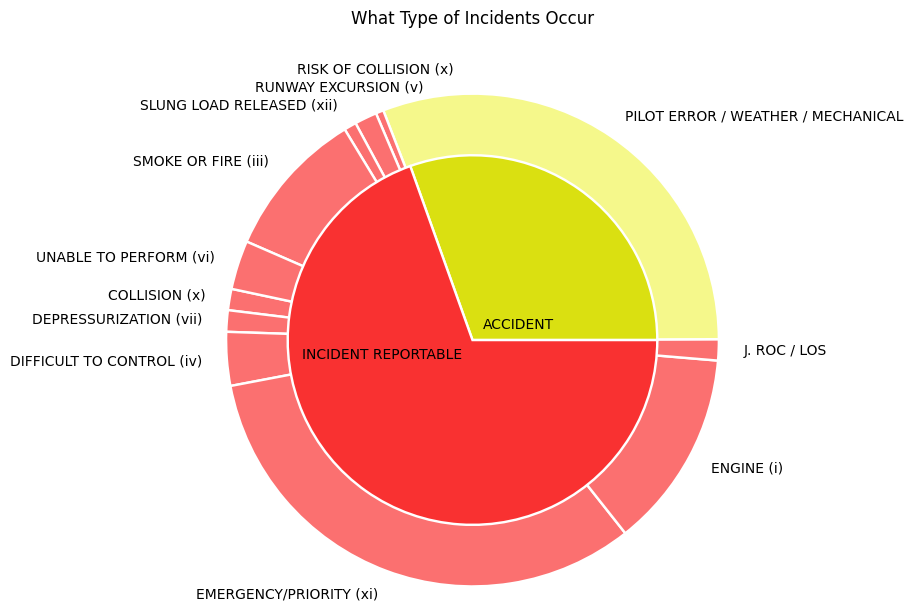

In [9]:
colors=['#FB7070','#FB7070','#FB7070','#FB7070','#FB7070','#FB7070','#F5F88B','#FB7070','#FB7070','#FB7070','#FB7070','#FB7070']
fig, ax = plt.subplots(figsize=(4, 4))
labelsout=['Emergency','Pilot Error','Engine','Fire','Difficult to Control','Unable to Perform','Runway Excursion','Depressurization','Collision','J.ROC/LOS','Slung Load Released','Collision Risk','Fuel Shortage','Dangerous Goods','Contaminated Fuel','Landing Gear','Drags on Ground','Transmission','Loss of Separation']
x1,y1=ax.pie(df4outer['reportable_incident'],labels=df4outer['incident_type'],radius=2,colors=colors,startangle=168, wedgeprops = {'linewidth': 1.75, 'edgecolor':'white'},labeldistance=1.1,textprops={'fontsize': 10})
x,y=ax.pie(df4inner['incident_type'],labels=df4inner['reportable_incident'],radius=1.5,colors=['#DAE011','#F93131'], wedgeprops = {'linewidth': 1.75, 'edgecolor':'white'},labeldistance=0.1)
ax.set_title("What Type of Incidents Occur",y=1.5)
y1[7].set_position((-0.15,2.2))
y1[8].set_position((-0.4,2.05))